![Image](https://1et31t3azwc3jxcfm1s69wb8-wpengine.netdna-ssl.com/wp-content/uploads/2018/04/Indian-apparel-industry.gif)

**Little About the Domain**

Foreign trade Includes Import and Export.
**Importing** means buying foreign goods and services by citizens, businesses and government of a country. No matter, how they are sent to the country. They can be shipped, sent it by e-mail, or even hand carried in personal luggage on a plane. A country importing more than it’s export, runs a **trade deficit**. Whereas, a country importing less than it’s exports, create a **trade surplus**.

**Exporting** means goods and services which are produced in one country are purchased in another country. It is produced domestically and sold to someone in a foreign country. Most countries want to increase their exports as it increases the GDP of the country.

In India At the level of Central Government it is administered by the Ministry of Commerce and Industry.

Prior to the 1991 economic liberalisation,India was a closed economy due to the average tariffs exceeding 200 percent and the extensive quantitative restrictions on imports. Foreign investment was strictly restricted to only allow Indian ownership of businesses. Since the liberalisation, India's economy has improved mainly due to increased foreign trade

[More on Quora](https://www.quora.com/What-is-import-and-export)
[More on Wikis](https://en.wikipedia.org/wiki/Foreign_trade_of_India)

**Loading Libraries**

we will import libraries for data processing and preparing charts 

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# charts
import seaborn as sns 
import matplotlib.pyplot as plt
import squarify #TreeMap

# import graph objects as "go"

import plotly.graph_objs as go

%matplotlib inline

#ignore warning 
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the "../input/" directory.
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/india-trade-data/2018-2010_export.csv
/kaggle/input/india-trade-data/2018-2010_import.csv


**Data Loading**

we need to load two files one for import and other for export . The Files contain import and export data from 2010 to 2018.

In [2]:
data_import = pd.read_csv("/kaggle/input/india-trade-data/2018-2010_import.csv")
data_export = pd.read_csv("/kaggle/input/india-trade-data/2018-2010_export.csv")

**Data Sneak Peek**

we will take a quick look on what data we have . 

In [3]:
data_export.head(5)

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


In [4]:
data_import.head(5)

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018


In both the File we have 5 columns each.
* HSCode - HS stands for Harmonized System. It was developed by the WCO (World Customs Organization) as a multipurpose international product nomenclature that describes the type of good that is shipped
HS Code Structure

    The HS code can be described as follows:

    It is a six-digit identification code.
    It has 5000 commodity groups.
    Those groups have 99 chapters.
    Those chapters have 21 sections.
    It’s arranged in a legal and logical structure.
    Well-defined rules support it to realize uniform classification worldwide.
    
   the HSCode in column is 99 chapters 
   
   [Reference](https://www.tradefinanceglobal.com/freight-forwarding/what-is-an-hs-code/)
   [HSCode List  ](http://www.cybex.in/HS-Codes/Default.aspx)
   
* Commodity - the column contain chapter wise commodity category. In each commodity Category there are various commodities.

A **commodity** is an economic good or service that has full or substantial fungibility: that is, the market treats instances of the good as equivalent or nearly so with no regard to who produced them. 

[Reference](https://en.wikipedia.org/wiki/Commodity)

* Value - values for export and import of commodities in million US $.
* Country - Country Imported From/ Exported To
* Year - Year in which comodities where Imported/Exported which is in between 2010 to 2018.

In [5]:
data_export.describe()

,HSCode,value,year
count,137023.000000,122985.000000,137023.000000
mean,51.330302,21.567829,2014.056304
std,28.018026,229.701279,2.580160
min,1.000000,0.000000,2010.000000
25%,28.000000,0.030000,2012.000000
50%,52.000000,0.360000,2014.000000
75%,74.000000,3.770000,2016.000000
max,99.000000,19805.170000,2018.000000


* HSCode shows data is under 1 to 99 which is correct as we discussed above.
* Value is showing a huge outlier as 75 % data is below 3.7 and maximum is 19805 seems some items category are very expensive .we will research it on this in later.also min is zero as some export may be two small to roundoff in two decimal.
* Year is under 2010 to 2018 Perfect.

In [6]:
data_import.describe()

,HSCode,value,year
count,76124.000000,64536.000000,76124.000000
mean,53.905023,62.361425,2014.018299
std,27.546852,666.327177,2.579385
min,1.000000,0.000000,2010.000000
25%,30.000000,0.030000,2012.000000
50%,54.000000,0.370000,2014.000000
75%,78.000000,4.780000,2016.000000
max,99.000000,32781.570000,2018.000000


* HSCode shows data is under 1 to 99 which is correct as we discussed above.
* Value is showing a huge outlier as 75 % data is below 4.9 and maximum is 32781 seems some items category are very expensive .also min is zero as some import may be two small. 
* Year is under 2010 to 2018 Perfect.



In [7]:
data_export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137023 entries, 0 to 137022
Data columns (total 5 columns):
HSCode       137023 non-null int64
Commodity    137023 non-null object
value        122985 non-null float64
country      137023 non-null object
year         137023 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.2+ MB


In [8]:
data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76124 entries, 0 to 76123
Data columns (total 5 columns):
HSCode       76124 non-null int64
Commodity    76124 non-null object
value        64536 non-null float64
country      76124 non-null object
year         76124 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.9+ MB


* Export files  have 137023 rows of data
* Import files around have 67799 rows of data
* Value contain null value for both import and export


**Code Cleanup**

so there is need of code cleanup to better visualize the data.
lets find out the key area to cleaup


In [9]:
data_import.isnull().sum()

HSCode           0
Commodity        0
value        11588
country          0
year             0
dtype: int64

In [10]:
data_import[data_import.value==0].head(5)

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.0,AFGHANISTAN TIS,2018
9,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",0.0,AFGHANISTAN TIS,2018
11,41,RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND ...,0.0,AFGHANISTAN TIS,2018
20,81,OTHER BASE METALS; CERMETS; ARTICLES THEREOF.,0.0,AFGHANISTAN TIS,2018
22,84,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",0.0,AFGHANISTAN TIS,2018


In [11]:
data_import[data_import.country == "UNSPECIFIED"].head(5)

,HSCode,Commodity,value,country,year
8263,1,LIVE ANIMALS.,NaN,UNSPECIFIED,2018
8264,2,MEAT AND EDIBLE MEAT OFFAL.,NaN,UNSPECIFIED,2018
8265,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",3.1,UNSPECIFIED,2018
8266,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,0.1,UNSPECIFIED,2018
8267,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",NaN,UNSPECIFIED,2018


In [12]:
print("Duplicate imports : "+str(data_import.duplicated().sum()))
print("Duplicate exports : "+str(data_export.duplicated().sum()))


Duplicate imports : 1031
Duplicate exports : 0


From the Above data check we find out columns to cleanup.
* Value column  has Null values.
* Value Column has zero value.
* Country column has unspecified value.
* Duplicate imports rows

there can be various way to handle it but for now we are deleting the rows .
Discalmer:- As we are deleting rows some of the analysis may be imapcted but it is ok for educational purpose.

In [13]:
def cleanup(data_df):
    #setting country UNSPECIFIED to nan
    data_df['country']= data_df['country'].apply(lambda x : np.NaN if x == "UNSPECIFIED" else x)
    #ignoring where import value is 0 . 
    data_df = data_df[data_df.value!=0]
    data_df.dropna(inplace=True)
    data_df.year = pd.Categorical(data_df.year)
    data_df.drop_duplicates(keep="first",inplace=True)
    return data_df

In [14]:
data_import = cleanup(data_import)
data_export = cleanup(data_export)

In [15]:
data_import.isnull().sum()

HSCode       0
Commodity    0
value        0
country      0
year         0
dtype: int64

 ** Commodity Analysis**

* Commodity Import Count

In [16]:
print("Import Commodity Count : "+str(len(data_import['Commodity'].unique())))
print("Export Commodity Count : "+str(len(data_export['Commodity'].unique())))

Import Commodity Count : 98
Export Commodity Count : 98


So why is there just 98 Commodity when there 99 chapters.(This is not deleted in code cleanup)
So to findout where is the missing commodity. I printed all HSCode and find out that 77 is missing.
* HSCode 77 is actually reserved for Possible Future Use.

[HSCode-77 ](http://www.cybex.in/HS-Codes/Reserved-Possible-Future-Use-Chapter-77.aspx)

* Commodity count based on different import (country/year)
Lets count the most popular import Commodity . popular just as no of transactions(country/year) are more for this category.

In [17]:
df = pd.DataFrame(data_import['Commodity'].value_counts())
df.head(20)

,Commodity
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",1378
IRON AND STEEL,1333
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",1314
ALUMINIUM AND ARTICLES THEREOF.,1217
PLASTIC AND ARTICLES THEREOF.,1112
COPPER AND ARTICLES THEREOF.,1058
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",1009
WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.,983
RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND LEATHER,983
"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",900


In [18]:
print("No of Country were we are importing Comodities are "+str(len(data_import['country'].unique())))
print("No of Country were we are Exporting Comodities are "+str(len(data_export['country'].unique())))

No of Country were we are importing Comodities are 240
No of Country were we are Exporting Comodities are 246


So India is doing Trade  with around 246 Countries. 

According http://www.world-country.com/ there are 247 countries and territories . 192 are only recognised by United Nation.

We cannot ignored the possibilty that data can be in short form or same country represented multiple time different way.

 **Import And Export Year Wise**

In [19]:
df3 = data_import.groupby('year').agg({'value':'sum'})

df4 = data_export.groupby('year').agg({'value':'sum'})


In [20]:
df3['deficit'] = df4.value - df3.value
df3

,value,deficit
year,,
2010,365444.94,-130033.93
2011,488272.63,-198761.05
2012,488805.22,-193858.35
2013,446095.99,-143251.86
2014,440463.87,-134304.07
2015,372291.40,-112499.98
2016,377006.72,-103641.56
2017,456379.59,-155301.41
2018,513981.62,-186830.19


In [21]:

# create trace1 
trace1 = go.Bar(
                x = df3.index,
                y = df3.value,
                name = "Import",
                marker = dict(color = 'rgba(0,191,255, 1)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df3.value)
# create trace2 
trace2 = go.Bar(
                x = df4.index,
                y = df4.value,
                name = "Export",
                marker = dict(color = 'rgba(1, 255, 130, 1)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df4.value)

trace3 = go.Bar(
                x = df3.index,
                y = df3.deficit,
                name = "Trade Deficit",
                marker = dict(color = 'rgba(220, 20, 60, 1)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df3.deficit)


data = [trace1, trace2, trace3]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
fig.update_layout(
    title=go.layout.Title(
        text="Yearwise Import/Export/Trade deficit",
        xref="paper",
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Year",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="Value",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    )
)




fig.show()

* Import is always more than the export creating a trade defecit which we can see in red bar graph.
* In 2011 2012 showing a huge huge trade deficit and after which it gradually decreases till 2016 and then increased in 2017 and 2018.

 **Import And Export Country Wise**

In [22]:
df5 = data_import.groupby('country').agg({'value':'sum'})
df5 = df5.sort_values(by='value', ascending = False)
df5 = df5[:10]

df6 = data_export.groupby('country').agg({'value':'sum'})
df6 = df6.sort_values(by='value', ascending = False)
df6 = df6[:10]

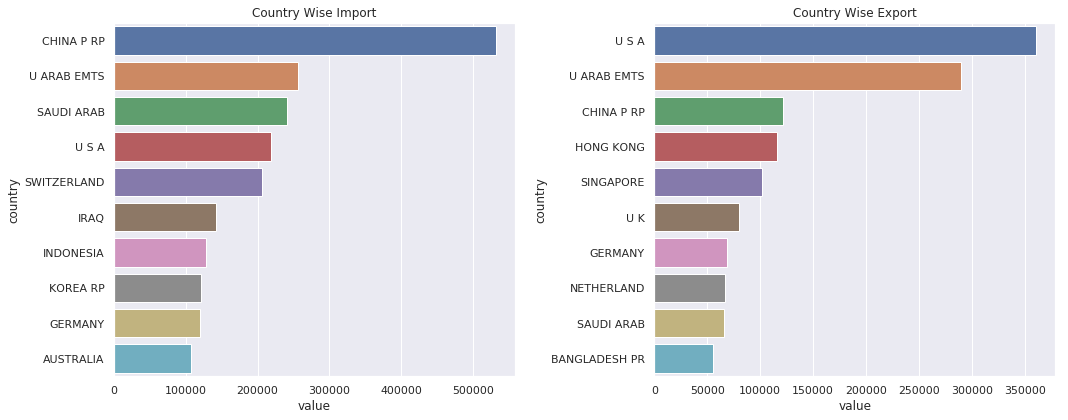

In [23]:
sns.set(rc={'figure.figsize':(15,6)})
ax1 = plt.subplot(121)

sns.barplot(df5.value,df5.index).set_title('Country Wise Import')

ax2 = plt.subplot(122)
sns.barplot(df6.value,df6.index).set_title('Country Wise Export')
plt.tight_layout()
plt.show()

* China has biggest market in india  followed by UAE,Saudi Arabia and USA
* USA is our biggest importer followed by UAE and China Republic.

**Trade Defecit/Surplus Top 5 country  **
* China - very Huge Trade Deficit
* UAE - little Trade Surplus
* Saudi Arabia- Huge Trade Deficit
* USA - little Trade Surplus
* Swizerland - not making even in the top export graph showing sign of Huge Trade Deficit.

 **Import And Export Year Wise Trend**

In [24]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=df3.index, y=df3.value, name='Import',mode='lines+markers',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=df4.index, y=df4.value, name = 'Export',mode='lines+markers',
                         line=dict(color='royalblue', width=4)))
fig.update_layout(
    title=go.layout.Title(
        text="Yearwise Import/Export",
        xref="paper",
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Year",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="Value",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    )
)

fig.show()

* slowdown in trade between 2014 - 2015 .
* In 2013 it shows export was on increase but the import was decreasing.
* Export shows Sideway trend  till 2014 after sharp decline in 2015 the export shows an upward trend.
* Import increased 2010 to 2011 then it shows a downward trend till 2015 and later sharp upward trend 

In [25]:
df3 = data_import.groupby('Commodity').agg({'value':'sum'})
df3 = df3.sort_values(by='value', ascending = False)
df3 = df3[:10]

df4 = data_export.groupby('Commodity').agg({'value':'sum'})
df4 = df4.sort_values(by='value', ascending = False)
df4 = df4[:10]

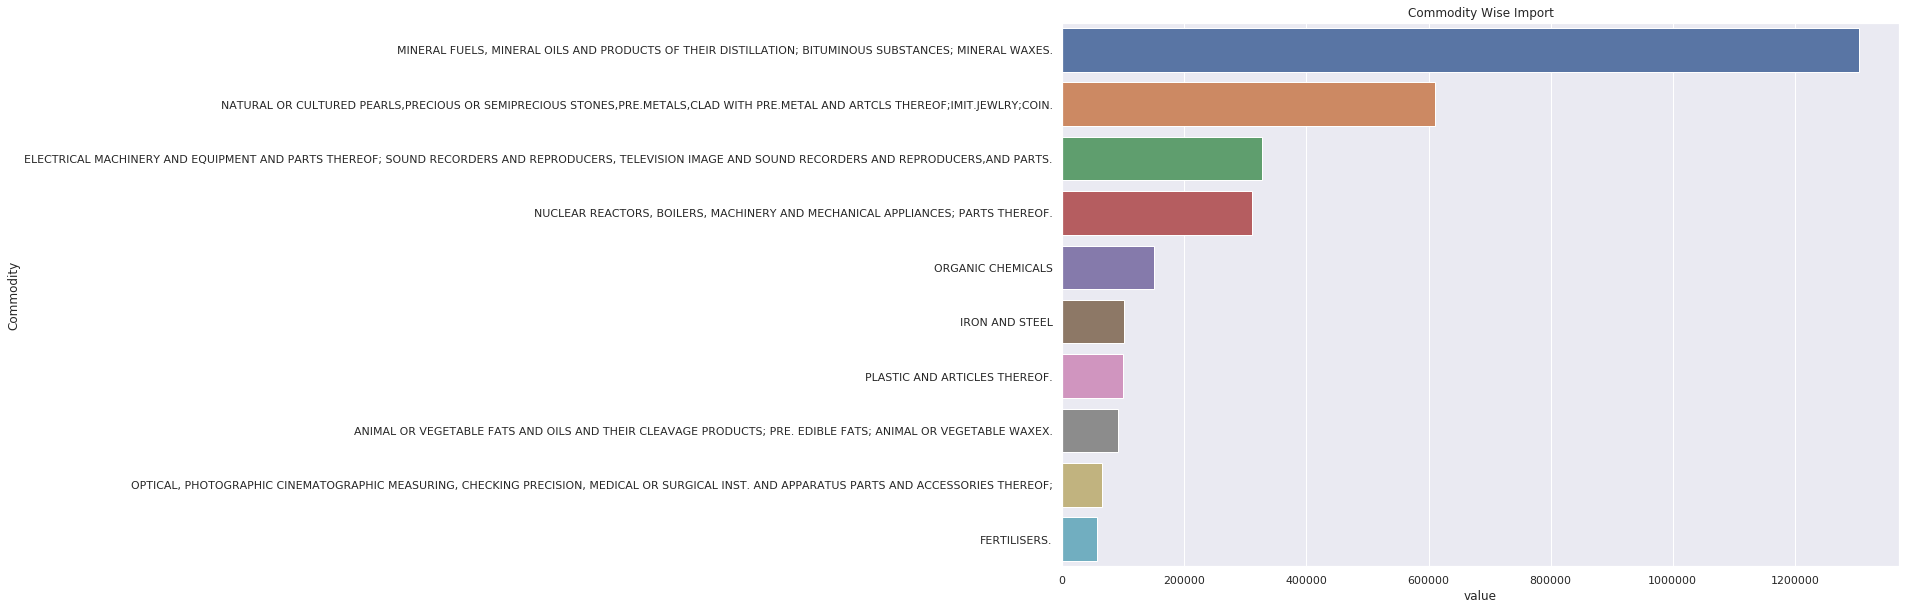

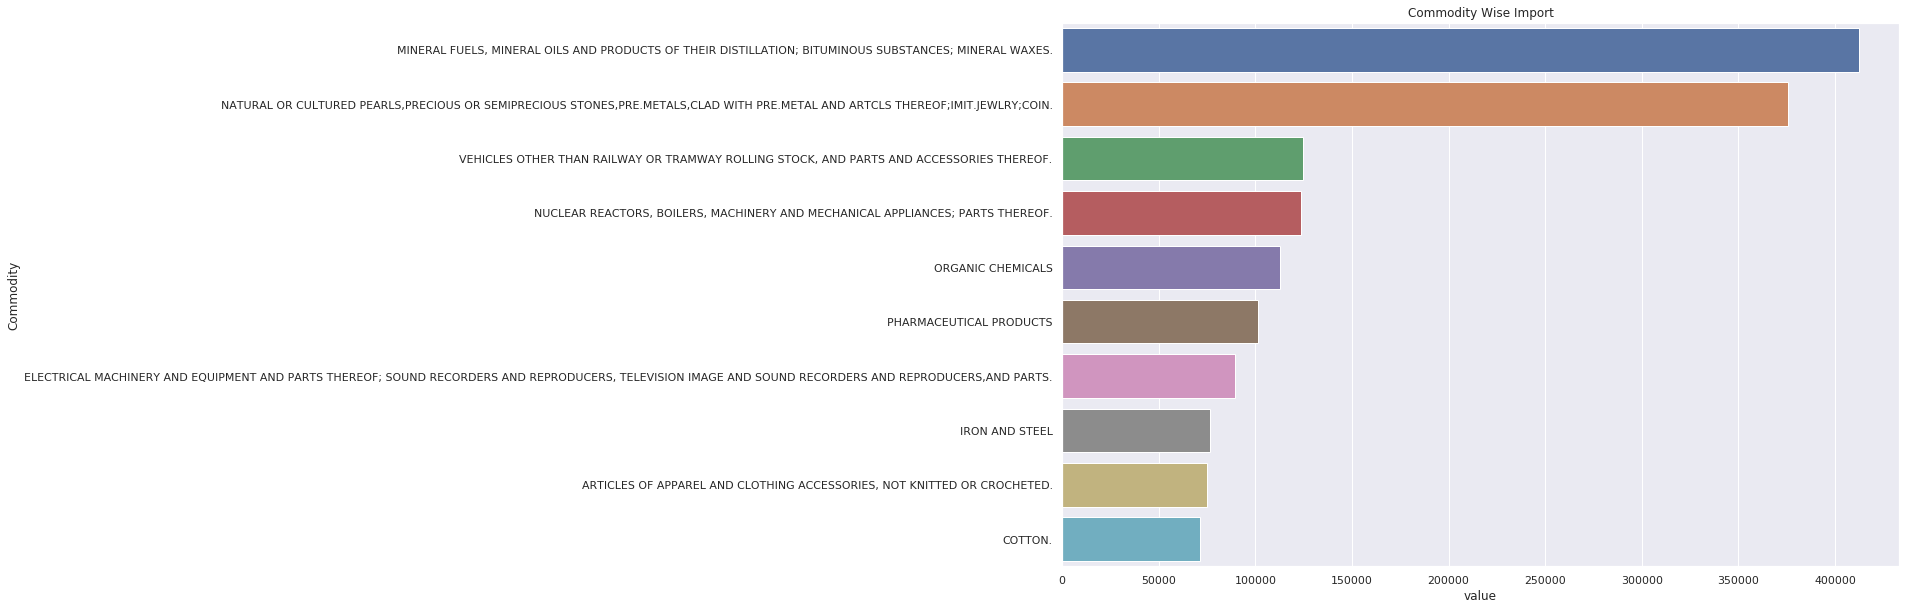

In [26]:
sns.set(rc={'figure.figsize':(15,10)})
#ax1 = plt.subplot(121)
sns.barplot(df3.value,df3.index).set_title('Commodity Wise Import')
plt.show()
#ax2 = plt.subplot(122)
sns.barplot(df4.value,df4.index).set_title('Commodity Wise Import')
plt.show()

* Top exported categories are also the top imoported categories but there is huge trade deficit category wise. 
* Vehicle Other Than railway...and Pharmaceutical product HScode Chapters shows a trade surplus 


1. **let's Analyse Expensive Import **

As we have seen there is huge difference in distribution we will analyse some of the expensive imports

In [27]:
expensive_import = data_import[data_import.value>1000]
expensive_import.head(10)

,HSCode,Commodity,value,country,year
55,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1559.37,ALGERIA,2018
95,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",4012.00,ANGOLA,2018
142,15,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,1720.46,ARGENTINA,2018
236,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",9664.58,AUSTRALIA,2018
701,71,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",6619.68,BELGIUM,2018
942,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1596.79,BRAZIL,2018
1215,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1165.81,CANADA,2018
1414,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1047.32,CHINA P RP,2018
1415,28,INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...,1050.23,CHINA P RP,2018
1416,29,ORGANIC CHEMICALS,8596.25,CHINA P RP,2018


** Import Value Vs HSCode(Commodity Code)**

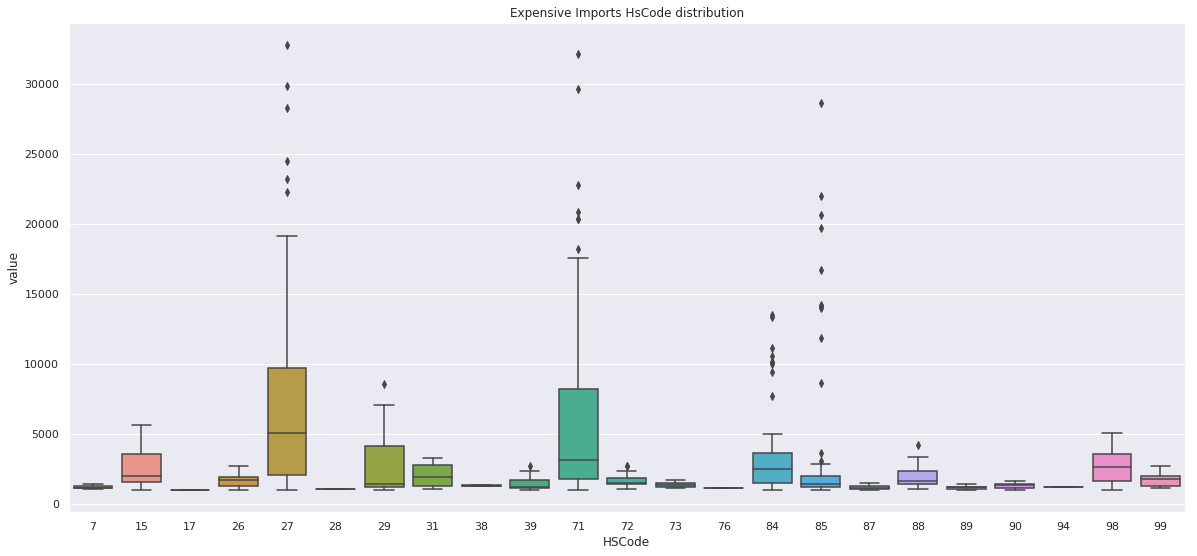

In [28]:
#fig, ax = plt.subplots(1,1,figsize=(18,6)) 
plt.figure(figsize=(20,9))
#plt.rcParams['figure.figsize']=(23,10)
# the size of A4 paper
#fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x="HSCode", y="value", data=expensive_import).set_title('Expensive Imports HsCode distribution')
plt.show()


* HSCode Chapter 27, 71 tops the expensive  import as already seen (Mineral Fuels and expensive jewellery)
* HSCode Chapter 15,29, 84, 85  also has a expensive imports.

In [29]:
df =expensive_import.groupby(['HSCode']).agg({'value': 'sum'})
df = df.sort_values(by='value')

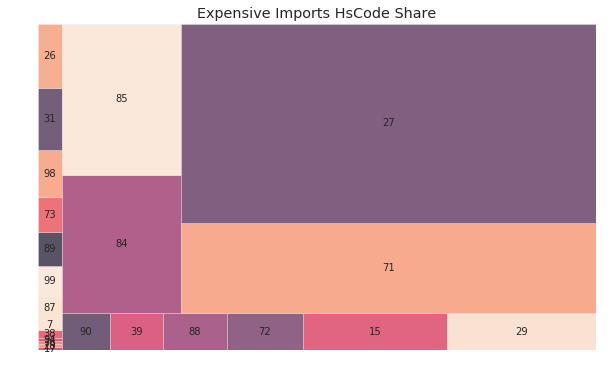

In [30]:
 
value=np.array(df)
commodityCode=df.index
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 6.0)
squarify.plot(sizes=value, label=commodityCode, alpha=.7 )
plt.axis('off')
plt.title("Expensive Imports HsCode Share")
plt.show()

* The share of the HSCode category 27, 71, 85, 84 in expensive Category has most valuable imports

**Country Analysis** 

In [31]:
len(expensive_import['country'].unique())

49

In [32]:
df1 = expensive_import.groupby(['country']).agg({'value': 'sum'})
df1 = df1.sort_values(by='value')

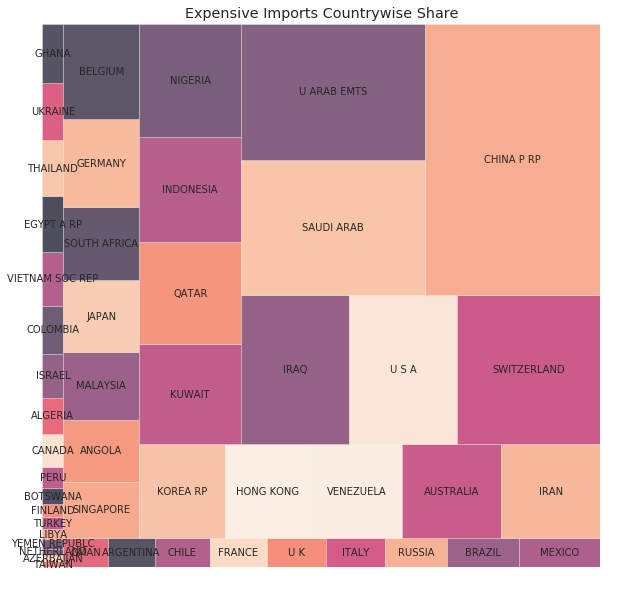

In [33]:
value=np.array(df1)
country=df1.index
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 10.0)
squarify.plot(sizes=value, label=country, alpha=.7 )
plt.title("Expensive Imports Countrywise Share")
plt.axis('off')
plt.show()

* Country Wise for Expensive Items China, Saudi Arab, UAE, Swizerland has most share followed by USA, Iraq 

**Conclusive Comments**
* Need of the Hour is to reduce the trade deficit
* New Initiative taken by Goverment as "Skill India" , "Make In India", "Startup India" can help to boost the Export if the work is implemented on ground reality. 
* Bilateral ties between countries helps to reduce export duty which help the local company compete in global market.
* As India Primarily is a Agricultural Country training and Guiding and providing export quality crops/medicinal plant can help to boost agricultural export.


   **Thank you for taking Out Time to read this. Please Upvote Comment to keep me motivated**

![](http://pluspng.com/img-png/animated-thank-you-png-for-powerpoint-copyright-2018-animations-media-960.gif)